**Question:**
*Temporal changes in serotype distribution*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [ ]:
drive.mount('/content/gdrive')

Preparing pre and post data

In [2]:
data=files.upload()

Saving pre_pcv.csv to pre_pcv.csv


In [3]:
df1=pd.read_csv(io.StringIO(data['pre_pcv.csv'].decode('utf-8')))

In [4]:
df1.drop(df1[df1['serotype'] == 'ND'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NoPCV13'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'QNS'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NON TYPABLE'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NTD'].index, inplace = True)
df1

,year,serotype
0,2009,1
4,2009,2
6,2009,1
8,2009,12
9,2009,14
...,...,...
405,2015,5
407,2015,23F
409,2015,20
410,2015,23A


In [5]:
print(df1['serotype'].value_counts(ascending=False))

2       25
1       22
19F     17
23F     16
5       15
8       15
6B      14
23B     12
12      12
19A     11
45       8
6        7
6A       7
7F       7
14       7
6A/B     6
20       6
18       6
38       6
15B      5
9V       4
23A      3
13       3
12F      3
33B      3
18A      3
35B      3
10A      3
10F      3
18C      3
6C/D     2
17F      2
15A      2
6C       2
15F      2
24       2
7B       2
22F      2
6D       1
48       1
29       1
7A/F     1
15C      1
63       1
16F      1
33F      1
11A      1
11F      1
4        1
42       1
12A      1
24F      1
35F      1
7F/A     1
Name: serotype, dtype: int64


In [6]:
data=files.upload()

Saving Post_PCV.csv to Post_PCV.csv


In [7]:
df1=pd.read_csv(io.StringIO(data['Post_PCV.csv'].decode('utf-8')))

In [8]:
data=files.upload()

Saving Pre_PCV.csv to Pre_PCV.csv


In [9]:
df2=pd.read_csv(io.StringIO(data['Pre_PCV.csv'].decode('utf-8')))

In [10]:
df1

,serotype,Frequency_post
0,1,33
1,2,24
2,8,16
3,19F,14
4,5,13
...,...,...
59,33B,1
60,11F,1
61,4,1
62,12,1


In [11]:
df2

,serotype,Frequency_pre
0,2,25
1,1,22
2,19F,17
3,23F,16
4,5,15
5,8,15
6,6B,14
7,23B,12
8,12,12
9,19A,11


In [12]:
df3=pd.concat([df1['serotype'],df1['Frequency_post'],df2['Frequency_pre']],axis=1)
df3

,serotype,Frequency_post,Frequency_pre
0,1,33,25.0
1,2,24,22.0
2,8,16,17.0
3,19F,14,16.0
4,5,13,15.0
...,...,...,...
59,33B,1,NaN
60,11F,1,NaN
61,4,1,NaN
62,12,1,NaN


In [ ]:
te=pd.DataFrame(df3)
te.to_excel("Concat.xlsx")

In [13]:
df3['post-pre'] = df3['Frequency_post'] - df3['Frequency_pre']

In [14]:
df3.head(50)

,serotype,Frequency_post,Frequency_pre,post-pre
0,1,33,25.0,8.0
1,2,24,22.0,2.0
2,8,16,17.0,-1.0
3,19F,14,16.0,-2.0
4,5,13,15.0,-2.0
5,23F,13,15.0,-2.0
6,18C,12,14.0,-2.0
7,35B,11,12.0,-1.0
8,19A,10,12.0,-2.0
9,6A,9,11.0,-2.0


In [15]:
plt.rcParams['figure.figsize'] = [40,20]

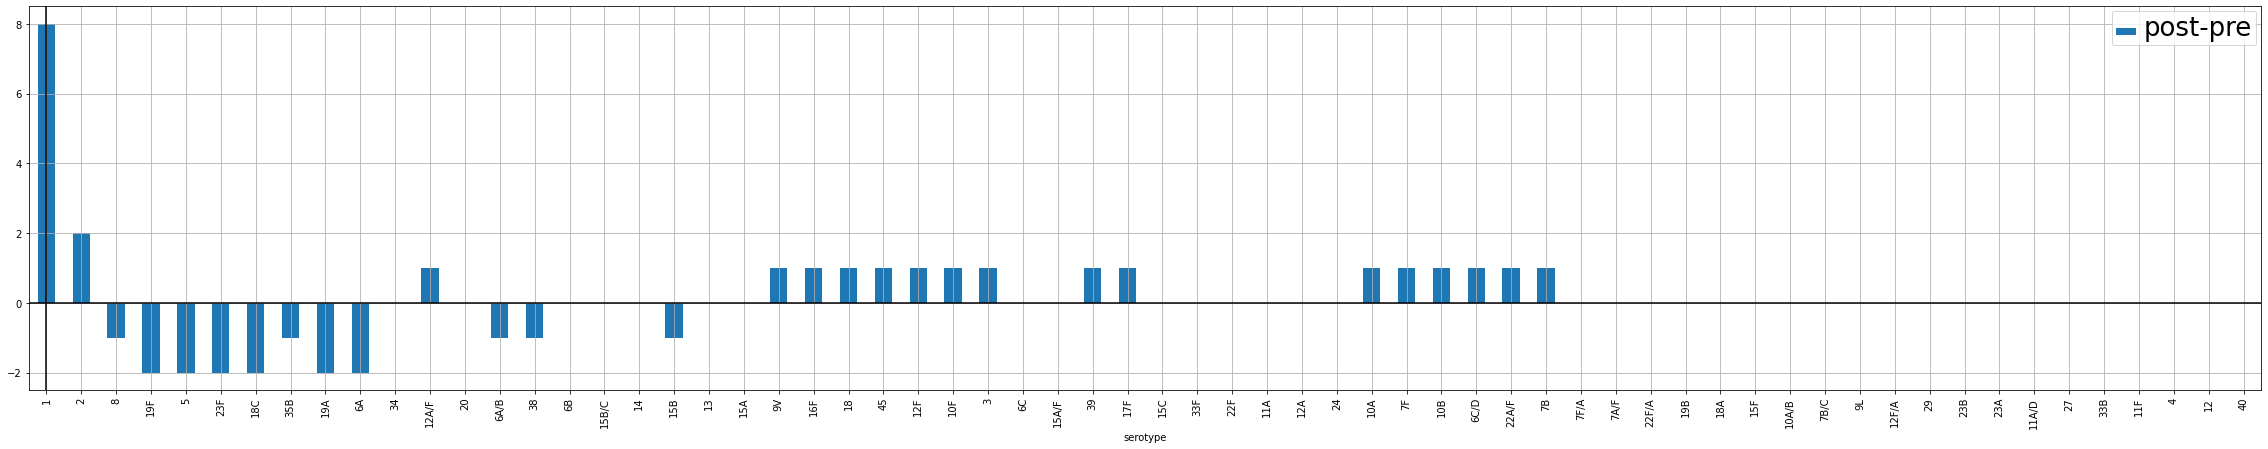

In [16]:
ax_1 = df3.plot.bar(x='serotype',y='post-pre')
plt.setp(ax_1.get_legend().get_texts(), fontsize='26') # for legend text
plt.setp(ax_1.get_legend().get_title(), fontsize='32') # for legend title

ax_1.set_aspect('equal')
ax_1.grid(True, which='both')

ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

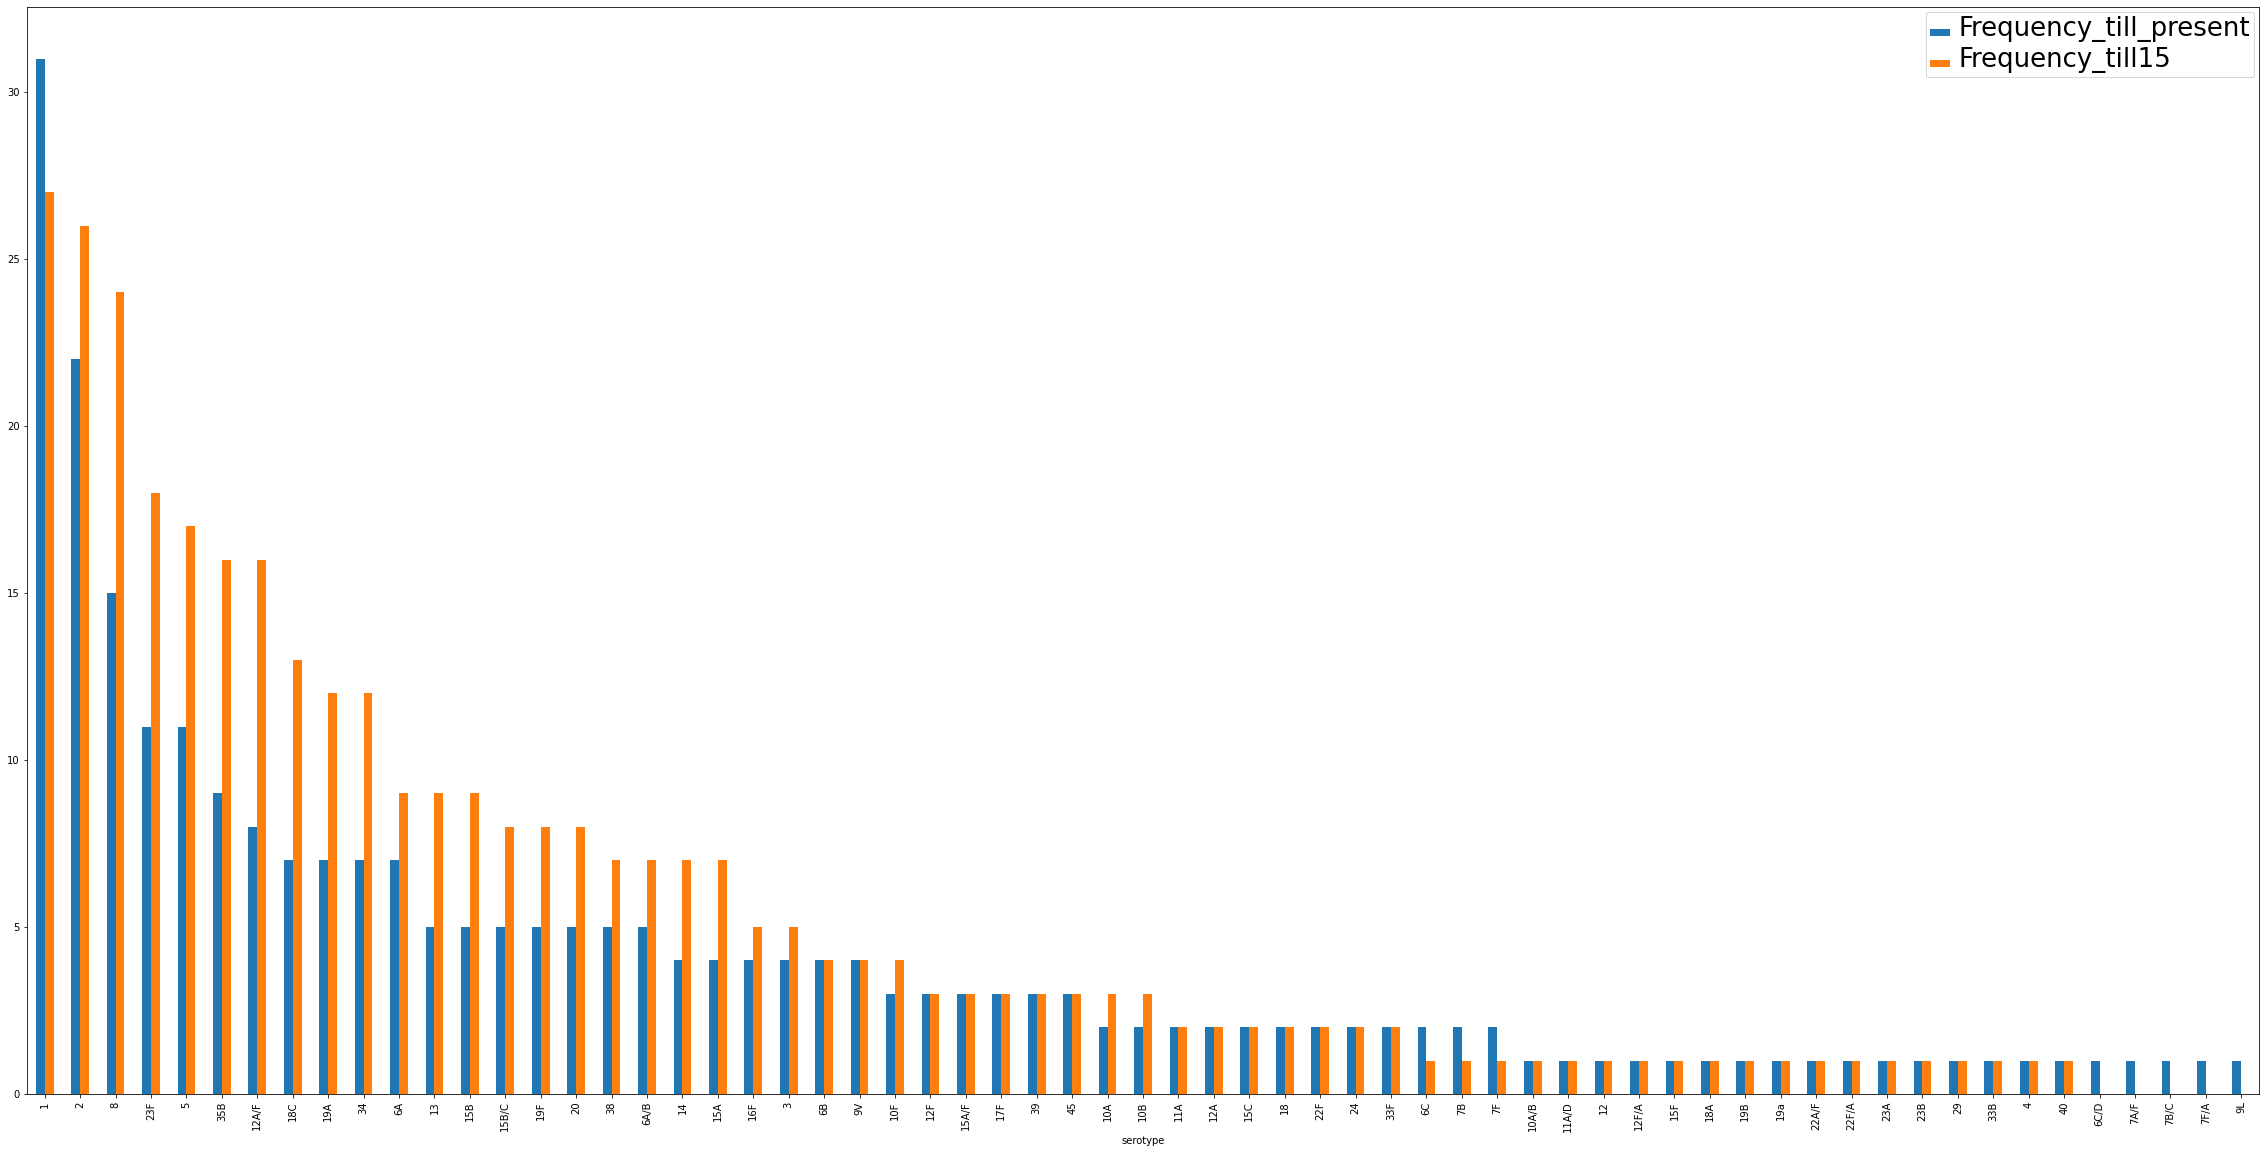

In [ ]:
ax = df3.plot.bar(x='serotype')
plt.setp(ax.get_legend().get_texts(), fontsize='26') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

plt.show()